In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_data = load_boston()
df = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)

In [10]:
X = df[['LSTAT']].values
y = boston_data.target.reshape(-1,1)

In [23]:
dTree = DecisionTreeRegressor(max_depth=10)
dTree.fit(X,y)
y_pred = dTree.predict(X)

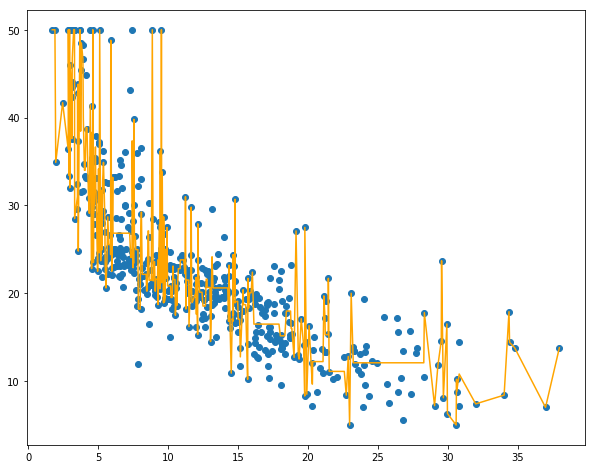

In [24]:
sort_idx = X.flatten().argsort()
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx],y[sort_idx])
plt.plot(X[sort_idx],y_pred[sort_idx],color='orange')
plt.show()

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rf_reg = RandomForestRegressor(n_estimators=1,n_jobs=-1)

In [61]:
X = df[['LSTAT','RM']].values
rf_reg.fit(X,y)
y_pred_rf = rf_reg.predict(X)
X.shape,y.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


((506, 2), (506, 1))

AttributeError: 'AxesSubplot' object has no attribute 'plot_wireframe'

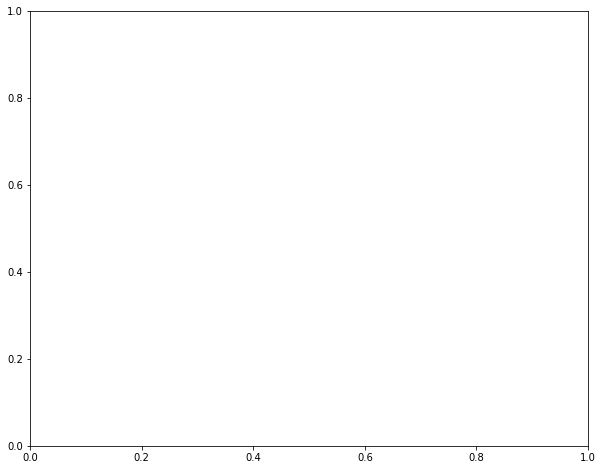

In [65]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot_wireframe(X[0],X[1],y)
# plt.scatter(X,y)
# plt.hist(X[::20],y_pred_rf[::20],color='orange')
plt.show()

In [66]:
from sklearn.ensemble import AdaBoostRegressor

In [67]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4))

In [68]:
ada.feature_importances_

AttributeError: 'AdaBoostRegressor' object has no attribute 'estimators_'

In [69]:
ada.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None)

In [70]:
ada.feature_importances_

array([0.65627513, 0.34372487])